# Linear and logistic regression

### Róbert Móro, Jakub Ševcech

IAU, 21.11.2019

## Please, give us your feedback here: https://tinyurl.com/iau2019-w09

## You can ask us directly or at http://slido.com#iau2019-w09

# Revision of the previous lecture: Evaluation and model selection

## Go to Slido

## Classification vs. regression

### Classification
* Predicted variable is qualitative = categorical (it has a set of values)
* E.g. mail classification - spam/not spam

### Regression
* Predicted variable is quantitative = numerical (real number from an interval)
* E.g. flat prices prediction

## Evaluation of machine learning models

We train on a train set -> we validate on a validation set

We select a model (its parameter values) based on its performance on the validation set

The performance on a test set = estimate of the model performance on new (unseen) data

## Evaluation metrics (for classification)

Accuracy

Precision, recall, F1 score

ROC (Receiver Operator Curve)

# Bias and variance

*Bias* is an error caused by the approximation of a complex problem by a simpler model.

*Variancia* reflects how $f'$ would change if we used a different train set.

Variance and bias can be controlled by the amount of data:

* we add additional training data
* we add additional features (and thus increase model complexity)

# Linear and logistic regression

## Today, we will have a look at 2 algorithms (machine learning approaches)

### Linear regression - regression

### Logistic regression - classification

<img src="img/excited.jpg" alt="So excited, I can't wait" style="margin-left: auto; margin-right: auto; width:800px"/>

# Linear regression

We use it when we want to:

Understand the relationship between dependent and independent variables

Predict the values of a dependent variable based on the values of the independent variables

## Simple linear regression

It assumes linear dependency between a dependent (predicted) and an independent variable.

$$ Y = \beta_0 + \beta_1X $$

$Y$ - dependent variable

$X$ - independent variable

$\beta_0$ - constant (intercept)

$\beta_1$ - slope

## Parameters are computed using the (ordinary) least squares method

<img src="img/least-squares.png" alt="Least squares method" style="margin-left: auto; margin-right: auto; width:400px"/>

Source: https://en.wikipedia.org/wiki/File:Least_Squares.png

## Least squares method

Residual: $e_i = y_i - \hat{y_i} = y_i - \hat{\beta_0} - \hat{\beta_1}x_i$

Residual sum of squares: $RSS = \sum_i^n{e_i^2}$

We try to minimize the error (RSS):

$$ \frac{\partial RSS}{\partial \hat{\beta_0}} = 0 \,\,\,\,\,\,\,\, \frac{\partial RSS}{\partial \hat{\beta_1}} = 0 $$

## Solution for a simple linear model:

$$ \hat{\beta_1} = \frac{\sum_{i=1}^n{(x_i-\overline{x})(y_i-\overline{y})}}{\sum_{i=1}^n{(x_i-\overline{x})}} $$

$$ \hat{\beta_0} = \overline{y}-\hat{\beta_1}\overline{x} $$

## To evaluate the model parameters, we use statistical hypotheses testing

Null hypotesis ($H_0$):
* Intercept $\beta_0 = 0$
* Slope $\beta_1 = 0$, i.e., there is no relationship between X and Y

## Metric used for evaluation of regression is typically residual standard error, RSE

$$ RSE = \sqrt{\frac{1}{n-2}RSS} = \sqrt{\frac{1}{n-2}\sum_{i=1}^n{(y_i-\hat{y_i})^2}} $$

It is measured in the units of the Y variable.

However, **MSE (Mean Squared Error)** or **RMSE (Root Mean Squared Error)** is used more often. 

$RMSE = RSE$, $RMSE = \sqrt{MSE}$

## We are also interested in the ration of variability that is explained by the used independent variables

$$ R^2 = \frac{TSS - RSS}{TSS} = 1 - \frac{RSS}{TSS} $$

where $TSS$ (total sum of squares) = $\sum{(y_i-\overline{y})}$

$R^2$ is independent from the units of Y. It has a value from $<0,1>$ interval.

## Linear regression in Python

`statsmodels`: http://www.statsmodels.org/stable/regression.html

`scikit-learn`: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [1]:
# Example taken from https://towardsdatascience.com/simple-and-multiple-linear-regression-in-python-c928425168f9

from sklearn import datasets
import numpy as np
import pandas as pd
import statsmodels.api as sm

data = datasets.load_boston()
print(data.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

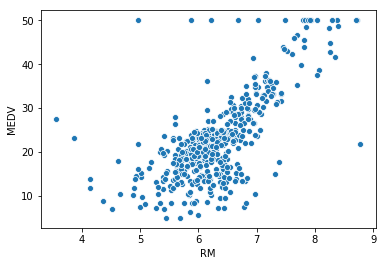

In [2]:
%matplotlib inline
import matplotlib
import seaborn as sns

df = pd.DataFrame(data.data, columns=data.feature_names)
df['MEDV'] = data.target

# MEDV (target): Median value of owner-occupied homes in $1000's
# RM: average number of rooms per dwelling
sns.scatterplot('RM', 'MEDV', data=df)

In [3]:
y = df.MEDV
X = df.RM
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Wed, 20 Nov 2019   Prob (F-statistic):           2.49e-74
Time:                        16:18:10   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -34.6706      2.650    -13.084      0.000     -39.877     -29.465
RM             9.1021      0.419     21.722      0.000       8.279       9.925
==============================================================================
Omnibus:                      102.585   Durbin-Watson:                   0.684
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              612.449
Skew:                           0.726   Prob(JB):                    1.02e-133
Kurtosis:                       8.190   Cond. No.                         58.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Different notation using a formula

In [4]:
from statsmodels.formula.api import ols

model = ols("MEDV ~ RM", df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Wed, 20 Nov 2019   Prob (F-statistic):           2.49e-74
Time:                        16:18:10   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -34.6706      2.650    -13.084      0.000     -39.877     -29.465
RM             9.1021      0.419     21.722      0.000       8.279       9.925
==============================================================================
Omnibus:                      102.585   Durbin-Watson:                   0.684
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              612.449
Skew:                           0.726   Prob(JB):                    1.02e-133
Kurtosis:                       8.190   Cond. No.                         58.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Linear regression in `scikit-learn`

In [5]:
from sklearn.linear_model import LinearRegression

y = df.MEDV
X = df[['RM']]

lm = LinearRegression().fit(X, y)
print("R^2: %f" % lm.score(X, y))
print(lm.intercept_, lm.coef_)

R^2: 0.483525
-34.67062077643857 [9.10210898]


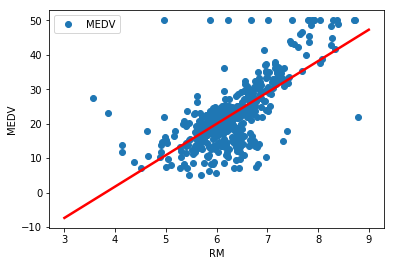

In [6]:
ax = df.plot(x="RM", y="MEDV", style="o")
ax.set_ylabel("MEDV")

rm = df[["RM"]].values
xs = range(int(np.min(rm[:,0])), int(np.max(rm[:,0])+2))
ys = [lm.predict([[x]]) for x in xs]
ax.plot(xs, ys, 'r', linewidth=2.5)

## Multiple linear regression

Generalization of a simple linear regression for multiple independent variables.

$$ Y = \beta_0 + \beta_1X_1 + \beta_2X_2 + \dots + \beta_pX_p + \epsilon $$

## When using multiple linear regression, we are typically interested in answering following questions

Is at least one of the predictors useful for predicting Y?
* Hypotheses testing

Do all predictors contribute to exaplaining variance in Y or only their subset?
* Attributes selection

## When using multiple linear regression, we are typically interested in answering following questions

How well does the model fit the data?
* RSE, $R^2$

If we have values of the variables, what response (prediction) can we expect and what will be its accuracy?
* Confidence intervals, prediction intervals

## When using multiple linear regression, we test whether at least one of the coefficients is not null

$H_0: \beta_1 = \beta_2 = \dots = \beta_p = 0$

$$ F = \frac{(TSS-RSS)/p}{RSS/(n-p-1)} $$

In [7]:
model = ols("MEDV ~ RM + LSTAT", df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.639
Model:                            OLS   Adj. R-squared:                  0.637
Method:                 Least Squares   F-statistic:                     444.3
Date:                Wed, 20 Nov 2019   Prob (F-statistic):          7.01e-112
Time:                        16:18:10   Log-Likelihood:                -1582.8
No. Observations:                 506   AIC:                             3172.
Df Residuals:                     503   BIC:                             3184.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.3583      3.173     -0.428      0.669      -7.592       4.875
RM             5.0948      0.444     11.463      0.000       4.222       5.968
LSTAT         -0.6424      0.044    -14.689      0.000      -0.728      -0.556
==============================================================================
Omnibus:                      145.712   Durbin-Watson:                   0.834
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              457.690
Skew:                           1.343   Prob(JB):                    4.11e-100
Kurtosis:                       6.807   Cond. No.                         202.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [8]:
y = df.MEDV
X = df[df.columns.difference(['MEDV'])]
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Wed, 20 Nov 2019   Prob (F-statistic):          6.72e-135
Time:                        16:18:10   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.000      26.432      46.487
AGE            0.0007      0.013      0.052      0.958      -0.025       0.027
B              0.0093      0.003      3.467      0.001       0.004       0.015
CHAS           2.6867      0.862      3.118      0.002       0.994       4.380
CRIM          -0.1080      0.033     -3.287      0.001      -0.173      -0.043
DIS           -1.4756      0.199     -7.398      0.000      -1.867      -1.084
INDUS          0.0206      0.061      0.334      0.738      -0.100       0.141
LSTAT         -0.5248      0.051    -10.347      0.000      -0.624      -0.425
NOX          -17.7666      3.820     -4.651      0.000     -25.272     -10.262
PTRATIO       -0.9527      0.131     -7.283      0.000      -1.210      -0.696
RAD            0.3060      0.066      4.613      0.000       0.176       0.436
RM             3.8099      0.418      9.116      0.000       2.989       4.631
TAX           -0.0123      0.004     -3.280      0.001      -0.020      -0.005
ZN             0.0464      0.014      3.382      0.001       0.019       0.073
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Beware: $R^2$ monotonously increases with the increasing number of predictors (RSS, on the other hand, decreases)

In [9]:
from sklearn import preprocessing

y = df.MEDV
X = df[['RM']]

X1 = sm.add_constant(X)
model1 = sm.OLS(y, X1).fit()

X2 = sm.add_constant(preprocessing.PolynomialFeatures(2).fit_transform(X))
model2 = sm.OLS(y, X2).fit()

X3 = sm.add_constant(preprocessing.PolynomialFeatures(3).fit_transform(X))
model3 = sm.OLS(y, X3).fit()

print(model1.rsquared, model2.rsquared, model3.rsquared)

0.48352545599133423 0.5484256373971057 0.5612257226355395


We can use Adjusted-$R^2$ instead:

$$ Adjusted R^2 = 1 - \frac{RSS / (n-p-1)}{TSS / (n-1)} $$

However, it is better to compare various linear models using MSE (RMSE) computed using **test (or validation) data**.

## Qualitative predictors (nominal variables)

One-hot encoding = we create $k-1$ substitute (dummy) variables. 

For each value of a nominal variable, we get a different linear model (shifted by the intercept):

Keď $x_i = 0$: $ y_i = \beta_0 + \beta_1x_i + \epsilon_i = \beta_0 + \epsilon_i$ 

Keď $x_i = 1$: $ y_i = \beta_0 + \beta_1x_i + \epsilon_i = \beta_0 + \beta_1 + \epsilon_i$

In [10]:
df['CRIM_CAT'] = df['CRIM'] > df['CRIM'].median()

model = ols("MEDV ~ RM + CRIM_CAT", df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.508
Model:                            OLS   Adj. R-squared:                  0.506
Method:                 Least Squares   F-statistic:                     259.6
Date:                Wed, 20 Nov 2019   Prob (F-statistic):           3.51e-78
Time:                        16:18:10   Log-Likelihood:                -1660.8
No. Observations:                 506   AIC:                             3328.
Df Residuals:                     503   BIC:                             3340.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          -31.1831      2.682    -11.629      0.000     -36.452     -25.915
CRIM_CAT[T.True]    -2.9062      0.582     -4.994      0.000      -4.049      -1.763
RM                   8.7784      0.415     21.178      0.000       7.964       9.593
==============================================================================
Omnibus:                      160.331   Durbin-Watson:                   0.712
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              997.456
Skew:                           1.230   Prob(JB):                    2.54e-217
Kurtosis:                       9.423   Cond. No.                         60.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

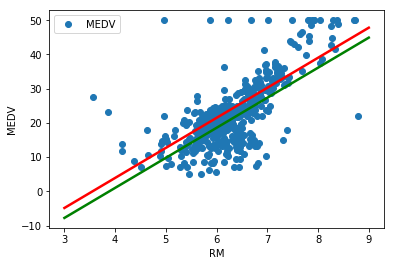

In [11]:
ax = df.plot(x="RM", y="MEDV", style="o")
ax.set_ylabel("MEDV")

rm = df[["RM", "CRIM_CAT"]].values
xs = range(int(np.min(rm[:,0])), int(np.max(rm[:,0])+2))

no_crim = pd.DataFrame(columns=['RM','CRIM_CAT'])
no_crim.RM = xs
no_crim.CRIM_CAT = False
ys1 = model.predict(no_crim)

crim = pd.DataFrame(columns=['RM','CRIM_CAT'])
crim.RM = xs
crim.CRIM_CAT = True
ys2 = model.predict(crim)

ax.plot(xs, ys1, 'r', xs, ys2, 'g', linewidth=2.5)

## Interactions between predictors

$$ Y = \beta_0 + \beta_1X_1 + \beta_2X_2 + \beta_3X_1X_2 + \epsilon $$

In [12]:
model = ols("MEDV ~ RM * CRIM_CAT", df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.527
Model:                            OLS   Adj. R-squared:                  0.524
Method:                 Least Squares   F-statistic:                     186.4
Date:                Wed, 20 Nov 2019   Prob (F-statistic):           3.36e-81
Time:                        16:18:10   Log-Likelihood:                -1650.9
No. Observations:                 506   AIC:                             3310.
Df Residuals:                     502   BIC:                             3327.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept             -48.2038      4.617    -10.442      0.000     -57.274     -39.134
CRIM_CAT[T.True]       21.8475      5.545      3.940      0.000      10.952      32.743
RM                     11.4402      0.719     15.905      0.000      10.027      12.853
RM:CRIM_CAT[T.True]    -3.9141      0.872     -4.488      0.000      -5.628      -2.201
==============================================================================
Omnibus:                      162.045   Durbin-Watson:                   0.669
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              938.652
Skew:                           1.270   Prob(JB):                    1.49e-204
Kurtosis:                       9.170   Cond. No.                         181.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

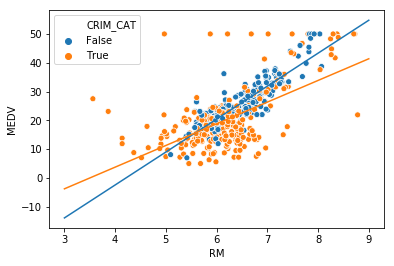

In [13]:
sns.scatterplot('RM', 'MEDV', data=df, hue='CRIM_CAT')

rm = df[["RM", "CRIM_CAT"]].values
xs = range(int(np.min(rm[:,0])), int(np.max(rm[:,0])+2))

no_crim = pd.DataFrame(columns=['RM','CRIM_CAT'])
no_crim.RM = xs
no_crim.CRIM_CAT = False
ys_false = model.predict(no_crim)

crim = pd.DataFrame(columns=['RM','CRIM_CAT'])
crim.RM = xs
crim.CRIM_CAT = True
ys_true = model.predict(crim)

sns.lineplot(xs, ys_false)
sns.lineplot(xs, ys_true)

## What if relationship between a predictor and a predicted variable is not linear?

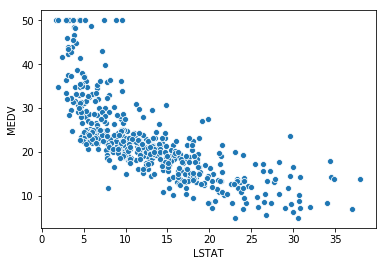

In [14]:
sns.scatterplot('LSTAT', 'MEDV', data=df)

Linear model can be extended by a polynomial transformation or other types of transformation (logarithm, square root, ...)

In [15]:
lm1 = ols("MEDV ~ LSTAT", df).fit()
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Wed, 20 Nov 2019   Prob (F-statistic):           5.08e-88
Time:                        16:18:11   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.5538      0.563     61.415      0.000      33.448      35.659
LSTAT         -0.9500      0.039    -24.528      0.000      -1.026      -0.874
==============================================================================
Omnibus:                      137.043   Durbin-Watson:                   0.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              291.373
Skew:                           1.453   Prob(JB):                     5.36e-64
Kurtosis:                       5.319   Cond. No.                         29.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
lm2 = ols("MEDV ~ np.log(LSTAT)", df).fit()
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.665
Model:                            OLS   Adj. R-squared:                  0.664
Method:                 Least Squares   F-statistic:                     1000.
Date:                Wed, 20 Nov 2019   Prob (F-statistic):          9.28e-122
Time:                        16:18:11   Log-Likelihood:                -1563.6
No. Observations:                 506   AIC:                             3131.
Df Residuals:                     504   BIC:                             3140.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        52.1248      0.965     54.004      0.000      50.228      54.021
np.log(LSTAT)   -12.4810      0.395    -31.627      0.000     -13.256     -11.706
==============================================================================
Omnibus:                      126.181   Durbin-Watson:                   0.918
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              323.855
Skew:                           1.237   Prob(JB):                     4.74e-71
Kurtosis:                       6.039   Cond. No.                         11.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

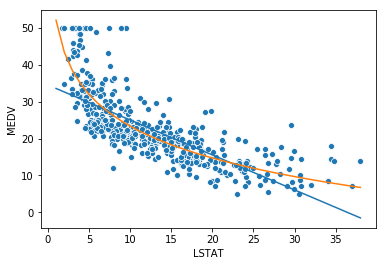

In [17]:
sns.scatterplot('LSTAT', 'MEDV', data=df)

lstat = df[["LSTAT"]].values
xs = range(int(np.min(lstat[:,0])), int(np.max(lstat[:,0])+2))

data = pd.DataFrame(columns=['LSTAT'])
data.LSTAT = xs

ys1 = lm1.predict(data)
ys2 = lm2.predict(data)

sns.lineplot(xs, ys1)
sns.lineplot(xs, ys2)

## Linear model diagnostics

Figure(864x288)


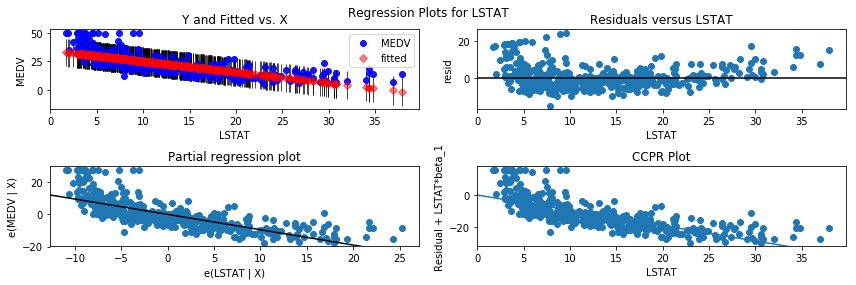

In [18]:
from statsmodels.graphics.regressionplots import plot_regress_exog
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12,4))
print(plot_regress_exog(lm1, 'LSTAT', fig=fig))

## Other types of diagnostics (and what to watch for)

Observations with a high influence, outliers, colinearity, unequal variance of errors (heteroscedascity), correlated errors, ...

https://www.statsmodels.org/stable/diagnostic.html

http://www.statsmodels.org/devel/examples/notebooks/generated/regression_diagnostics.html

https://www.statsmodels.org/dev/examples/notebooks/generated/regression_plots.html

## Linear regression in the real world

<img src="img/seer.jpg" alt="Divination" style="margin-left: auto; margin-right: auto; width:600px"/>

### Prediction: IFP Calculator of the flat prices

http://www.institutfinancnejpolitiky.sk/kalkulacky/nehnutelnosti/

Attributes such as city (town), street, area, balcony, floor, etc.

### Understanding of relationship: Who voted for Kotleba?

https://dennikn.sk/402526/obraz-kotlebovej-podpory-zatial-velmi-povrchny-nieco-dolezite-unika/?cst=1324f9abaa007e30565f85fa6ace469f92e99f9f

Data from: election results, census, atlas of Roma communities in Slovakia, unemployment data

# Logistic regression

## Could we use linear regression also for classification?

*Áno* - let us have two classes (0/1); we choose a treshold for predicting 0 and when  we start to predict 1.

However, it could be a problem how to interpret values less than 0 and larger than 1.

And it will not work for more than two classes (e.g., 0, 1, 2) - we would artificially set an order which would have no meaning.

### We can use regression for classification, but we would like to use a function that has values from <0,1> interval 

... *Logistic regression*

## Logistic function


$$p(Y=1|X) = p(X) = \frac{e^{\beta_0+\beta_1X}}{1 + e^{\beta_0+\beta_1X}}$$

<img src="img/logistic-curve.svg" alt="Logistic curve" style="margin-left: auto; margin-right: auto; width:600px"/>

Source: https://en.wikipedia.org/wiki/Logistic_function

### By adjusting the formula, we get:

$$ \frac{p(X)}{1-p(X)} = e^{\beta_0+\beta_1X} $$

where the left part of the equation represents the *odds*.

$$ \log{\left(\frac{p(X)}{1-p(X)}\right)} = \beta_0+\beta_1X $$

the left part of the equation repsents the *log-odds* or *logit*.

## Training the model = estimation of coefficients $\hat{\beta_i}$

Algorithm *Maximum Likelihood Estimation (MLE)* - the aim is to find such values of coefficients that the observations of 0 class have the probability close to 0 and vice versa. The following function is optimized:

$$ l(\beta_0, \beta_1) = \prod_{i:y_i=1}{p(x_i)} \prod_{i':y_{i'}=0}{(1-p(x_{i'}))} $$

## Multiple logistic regression

Generalization analogous to the one used in case of linear regression.

In [19]:
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression

data = load_breast_cancer()
label_names = data['target_names']
labels = data['target']
feature_names = data['feature_names']
features = data['data']

In [20]:
print(label_names)

['malignant' 'benign']


In [21]:
df = pd.DataFrame(features)
df.columns = feature_names
df['target'] = labels
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [22]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [23]:
from sklearn.model_selection import train_test_split
train, test, train_labels, test_labels = train_test_split(df[feature_names], df['target'], test_size=0.33, random_state=42)

In [24]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(train)

train = scaler.transform(train)
test = scaler.transform(test)

In [25]:
logit = LogisticRegression(solver='lbfgs')
logit.fit(train, train_labels)
preds = logit.predict(test)
preds[:10]

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1])

In [26]:
logit.coef_

array([[-0.36048257, -0.37928706, -0.34239942, -0.40981403, -0.0701941 ,
         0.6382286 , -0.79808635, -1.0985293 ,  0.15315188,  0.11908427,
        -1.17747141,  0.22238149, -0.70866434, -0.81444289, -0.20651383,
         0.53205463,  0.04447138, -0.43698303,  0.49799868,  0.59437411,
        -0.76099683, -1.28013819, -0.56382538, -0.71579019, -0.5415975 ,
         0.09222063, -0.97554811, -0.74688349, -1.16159623, -0.11296927]])

In [27]:
logit.score(test, test_labels)

0.9787234042553191

In [28]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

confusion_matrix(test_labels, preds)

array([[ 66,   1],
       [  3, 118]], dtype=int64)

In [29]:
precision_score(test_labels, preds)

0.9915966386554622

In [30]:
recall_score(test_labels, preds)

0.9752066115702479

In [31]:
from sklearn.metrics import classification_report
print(classification_report(test_labels, preds, digits=5))

              precision    recall  f1-score   support

           0    0.95652   0.98507   0.97059        67
           1    0.99160   0.97521   0.98333       121

   micro avg    0.97872   0.97872   0.97872       188
   macro avg    0.97406   0.98014   0.97696       188
weighted avg    0.97910   0.97872   0.97879       188



In [32]:
from sklearn.metrics import roc_curve, auc

probs = logit.predict_proba(test)

fpr, tpr, _ = roc_curve(test_labels, probs[:, 1]) # z pravdepodobnosti vypocitam body roc krivky
roc_auc = auc(fpr, tpr)

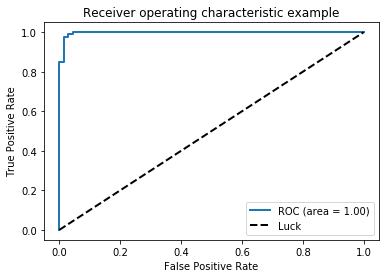

In [33]:
plt.plot(fpr, tpr, lw=2, label='ROC (area = %0.2f)' % (roc_auc))

plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='k', # nahodny klasifikator by spravil rovnu ciaru
         label='Luck')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [34]:
from sklearn.metrics import roc_auc_score
roc_auc_score(test_labels, probs[:, 1])

0.9972862957937585

### Logarithmic loss (Logloss)

It is used when we have an algorithm that predicts probability of an observation belonging to a class (such as logistic regression). It penalizes (or rewards) a model proportionally to its being sure of its (wrong or right) prediction.

In other words, the more the model is sure of a wrong prediciton, the more penalized by the metric it is.

$$log loss = -\frac{1}{N}\sum_{i=1}^N {(y_i\log(p_i) + (1 - y_i)\log(1 - p_i))}$$

https://towardsdatascience.com/understanding-binary-cross-entropy-log-loss-a-visual-explanation-a3ac6025181a

In [35]:
from sklearn.model_selection import cross_val_score

model = LogisticRegression(solver='lbfgs')
results = cross_val_score(model, train, train_labels, cv=10, scoring='neg_log_loss')
(results.mean(), results.std()) # cim mensia hodnota, tym lepsie

(-0.09569674356226468, 0.09754065232344436)

## Multiclass classification

It is a case when we have more than two classes. Not to be confused with multi-label classification (when an observation can be assigned multiple labels, i.e., classes).

##  How can be a binary classifier be generalized for multiclass classification?

### One-vs-rest (one-vs-all)

We train $k$ classifiers, in which the observations from $i$-th class are considered positive and the rest negative. When doing the actual prediction, we take the classifier with the highest confidence as a result.

### One-vs-one

We train $k(k-1)/2$ classifiers for all pairs of classes. When doing the actual prediction, we take the majority from votes of all classifiers as a result (in other words, the class that is predicted by the most of classifiers is taken as the result).

For more information, have a look here: https://en.wikipedia.org/wiki/Multiclass_classification

## The relationship between the logistic regression and the neural networks

<img src="img/logit-neural.png" alt="Logistic regression schema" style="margin-left: auto; margin-right: auto; width:800px"/>

Sources:

https://sebastianraschka.com/faq/docs/logisticregr-neuralnet.html

https://stats.stackexchange.com/questions/43538/difference-between-logistic-regression-and-neural-networks

## The main take-aways from the today's lecture

Do not dismiss simple models
* They can be surprisingly good on the real data
* Their advantages are also smaller computational requirements and their better interpretability

Beware the curse of dimensionality (too many predictors) 
* Therefore, we will look at **feature selection** next time

## Sources

G. James, D. Witten, T. Hastie, R. Tibshirani (2017). Introduction to Statistical Learning with Applications in R. https://www-bcf.usc.edu/~gareth/ISL/ (hlavne kap. 3 a 4)

In Python: 
* https://github.com/JWarmenhoven/ISLR-python 
* https://github.com/sujitpal/statlearning-notebooks
* https://github.com/mscaudill/IntroStatLearn

<img src="img/linear-regression-xkcd.png" alt="Linear regression at XKCD" style="margin-left: auto; margin-right: auto; width:800px"/>

Source: https://xkcd.com/1725/